### Task 1 - Matrix multiplication

Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [2]:
using DataFrames,Polynomials,LinearAlgebra,Statistics,Measures,Plots,CSV,TaylorSeries

In [3]:
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [5]:
df = DataFrame(Size=Int[],Naive=Float64[],Better=Float64[],Blas=Float64[])

for i in 100:100:1000
    for j in 1:11
        matrix_A = rand(0:9,(i,i))
        matrix_B = rand(0:9,(i,i))
        time1 = @elapsed naive_multiplication(matrix_A,matrix_B)
        time2 = @elapsed better_multiplication(matrix_A,matrix_B)
        time3 = @elapsed matrix_A*matrix_B
        if j!=1
            push!(df,(i,time1,time2,time3))
        end
    end
end

df

Row,Size,Naive,Better,Blas
,Int64,Float64,Float64,Float64
1,100,0.0015131,0.0017115,0.0007714
2,100,0.0009654,0.001023,0.0004038
3,100,0.0009512,0.0010026,0.0003976
4,100,0.0009699,0.0010272,0.000387
5,100,0.0009678,0.0009883,0.0004071
6,100,0.0009508,0.0010262,0.0004051
7,100,0.000951,0.0009952,0.0004131
8,100,0.0009311,0.0009974,0.0004279
9,100,0.0009272,0.0009755,0.0004003


In [6]:
stats = df2 = combine(
    groupby(df,:Size),
    :Naive => mean => :Naive_Mean,
    :Naive => std => :Naive_Std, 
    :Better => mean => :Better_Mean, 
    :Better => std => :Better_Std, 
    :Blas => mean => :Blas_Mean, 
    :Blas =>std => :Blas_Std
)

Row,Size,Naive_Mean,Naive_Std,Better_Mean,Better_Std,Blas_Mean,Blas_Std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,100,0.00100453,0.000179572,0.00107119,0.000225956,0.00044175,0.000116305
2,200,0.00730495,0.000321832,0.00747999,0.000622925,0.00271937,0.00011615
3,300,0.0274143,0.00443679,0.0277775,0.00441816,0.0117997,0.00464449
4,400,0.0669579,0.00511932,0.0644211,0.0109864,0.0224577,0.00150851
5,500,0.131596,0.00985677,0.124942,0.0153451,0.0445369,0.00526288
6,600,0.276025,0.0425683,0.255846,0.0492192,0.0984532,0.0250961
7,700,0.386558,0.0332747,0.363398,0.0516444,0.136575,0.0355491
8,800,0.604719,0.0652718,0.533813,0.0407464,0.188369,0.027879
9,900,0.87889,0.0788466,0.793456,0.0650546,0.285943,0.0399802


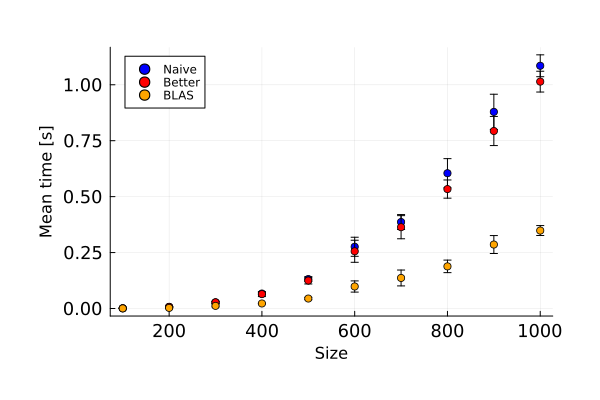

In [7]:
scatter(
    stats.Size,  
    margin=10mm,
    xtickfontsize=12, 
    ytickfontsize=12, 
    titlefontsize = 114,
    xlabel = "Size",
    ylabel = "Mean time [s]",
    [stats.Naive_Mean stats.Better_Mean stats.Blas_Mean], 
    legend_position = :topleft, 
    label = ["Naive" "Better" "BLAS"], 
    color = [:blue :red :orange],
    yerr = [stats.Naive_Std stats.Better_Std stats.Blas_Std]
)

### Task2 - Multiplication in C

Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**

#### Code in C

```c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <gsl/gsl_blas.h>
#include <fcntl.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <time.h>
#include <sys/times.h>
#include <sys/resource.h>

clock_t clock_start, clock_end;
struct tms st_cpu, en_cpu;

void timer_start(){ 
    clock_start = times(&st_cpu);
}
void timer_end(){ 
    clock_end = times(&en_cpu);
}

float real_time(){
    int clock_tics = sysconf(_SC_CLK_TCK);
    double real_time;
    real_time = (double ) (clock_end - clock_start)/ clock_tics;
    return real_time;
}

double **create_matrix(int n){
    double **matrix = calloc(n,sizeof(double *));
    for(int i = 0; i < n; i++){
        matrix[i] = calloc(n,sizeof(double));
        for(int j = 0; j < n; j++){
            matrix[i][j] = ((double)rand()/(double)(RAND_MAX)) * 10.0;
        }
    }
    return matrix;
}

double **create_matrix_zeros(int n){
    double **matrix = calloc(n,sizeof(double *));
    for(int i = 0; i < n; i++){
        matrix[i] = calloc(n,sizeof(double));
        for(int j = 0; j < n; j++){
            matrix[i][j] = 0.0;
        }
    }
    return matrix;
}

double *create_gsl_matrix(int n){
    double *matrix = calloc(n*n,sizeof(double));
    for(int i = 0; i < n*n; i++){
        matrix[i] = ((double)rand()/(double)(RAND_MAX)) * 10.0;
    }
    return matrix;
}

double *create_gsl_matrix_zeros(int n){
    double *matrix = calloc(n*n,sizeof(double));
    for(int i = 0; i < n*n; i++){
        matrix[i] = 0.0;
    }
    return matrix;
}

void free_matrix(double **matrix, int n){
    for(int i = 0; i < n; i++){
        free(matrix[i]);
    }
    free(matrix);
}

void naive_multiplication(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int j = 0; j < n; ++j)
            for (int k = 0; k < n; ++k)
                C[i][j] += A[i][k]*B[k][j];
}

void better_multiplication(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int k = 0; k < n; ++k)
            for (int j = 0; j < n; ++j)
                C[i][j] += A[i][k]*B[k][j];
}

void test(){
    FILE* file = fopen("time_test.csv","w");

    fprintf(file, "Size,Type,Time");
    double **A, **B, **C;
    float time;

    for(int i = 100; i < 1001; i+=100){
        printf("%d\n",i);
        for(int j = 0; j < 10; j++){
            A = create_matrix(i);
            B = create_matrix(i);
            C = create_matrix_zeros(i);

            timer_start();
            naive_multiplication(A,B,C,i);
            timer_end();
            time = real_time();
            fprintf(file,"\n%d,%s,%f",i,"n",time);

            free_matrix(C,i);
            C = create_matrix_zeros(i); 

            timer_start();
            better_multiplication(A,B,C,i);
            timer_end();
            time = real_time();
            fprintf(file,"\n%d,%s,%f",i,"b",time);

            double *a, *b, *c;
            a = create_gsl_matrix(i);
            b = create_gsl_matrix(i);
            c = create_gsl_matrix_zeros(i);
            gsl_matrix_view A1 = gsl_matrix_view_array(a,i,i);
            gsl_matrix_view B1 = gsl_matrix_view_array(b,i,i);
            gsl_matrix_view C1 = gsl_matrix_view_array(c,i,i);

            timer_start();
            gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                            1.0, &A1.matrix, &B1.matrix,
                            0.0, &C1.matrix);
            timer_end();
            time = real_time();
            fprintf(file,"\n%d,%s,%f",i,"g",time); 

            free(a);
            free(b);
            free(c);
        }
    }
    fclose(file);
}
int main(int argc, char **argv){
    srand((unsigned int)time(NULL));
    test();
    return 0;
}

```

In [8]:
df2 = CSV.read("time_test.csv", delim=",",DataFrame)

Row,Size,Type,Time
,Int64,String1,Float64
1,100,n,0.01
2,100,b,0.0
3,100,g,0.0
4,100,n,0.01
5,100,b,0.0
6,100,g,0.0
7,100,n,0.01
8,100,b,0.0
9,100,g,0.0


In [9]:
stats2 = combine(groupby(df2,[:Size, :Type]), "Time" => mean, "Time" => std)

Row,Size,Type,Time_mean,Time_std
,Int64,String1,Float64,Float64
1,100,n,0.007,0.00483046
2,100,b,0.003,0.00483046
3,100,g,0.001,0.00316228
4,200,n,0.041,0.00567646
5,200,b,0.041,0.00737865
6,200,g,0.004,0.00516398
7,300,n,0.138,0.00632456
8,300,b,0.136,0.00699206
9,300,g,0.013,0.00483046


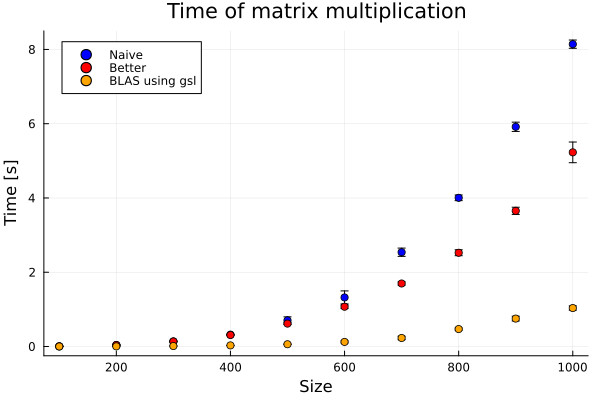

In [10]:
scatter(
    [stats2[stats2[:,2] .== "n", :].Size stats2[stats2[:,2] .== "b", :].Size stats2[stats2[:,2] .== "g", :].Size],
    [stats2[stats2[:,2] .== "n", :].Time_mean stats2[stats2[:,2] .== "b", :].Time_mean stats2[stats2[:,2] .== "g", :].Time_mean],
    colour = [:blue :red :orange],
    yerr = [stats2[stats2[:,2] .== "n", :].Time_std stats2[stats2[:,2] .== "b", :].Time_std stats2[stats2[:,2] .== "g", :].Time_std],
    label = [ "Naive" "Better" "BLAS using gsl"],
    title = "Time of matrix multiplication",
    xlab = "Size",
    ylab = "Time [s]"
)     

### Task 3 - Polynomial approximation

Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [11]:
x = stats2[stats2[:,2] .== "n", 1]
y_naive = stats2[stats2[:,2] .== "n", 3]
y_better = stats2[stats2[:,2] .== "b", 3]
y_blas = stats2[stats2[:,2] .== "g", 3]
println()

In [12]:
fit_naive = fit(x, y_naive, 3)
fit_better = fit(x, y_better, 3)
fit_blas = fit(x, y_blas, 2)
println()

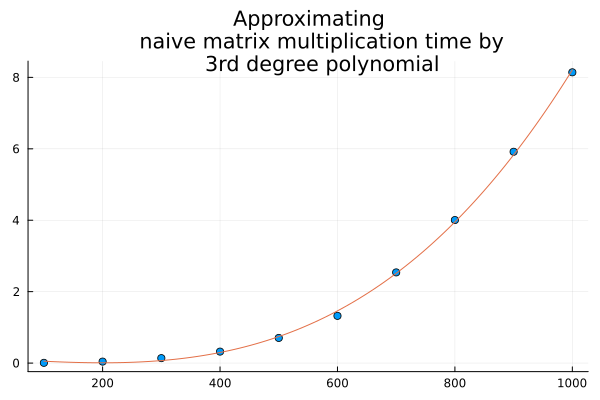

In [13]:
scatter(x, y_naive, label="")
plot!(fit_naive,  
    extrema(x)..., 
    label="",
    title = "Approximating
    naive matrix multiplication time by
    3rd degree polynomial"
)

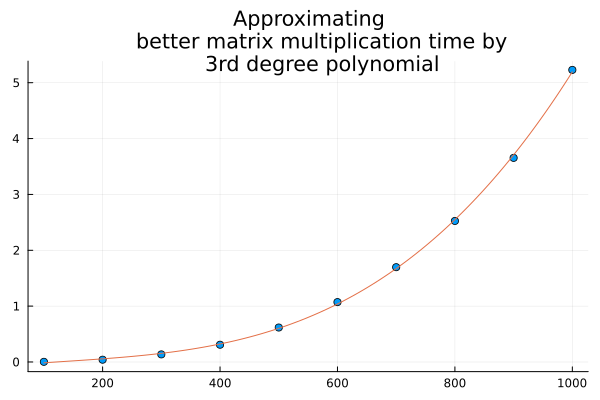

In [14]:
scatter(x, y_better, label="")
plot!(fit_better,  
    extrema(x)..., 
    label="",
    title = "Approximating
    better matrix multiplication time by
    3rd degree polynomial"
)

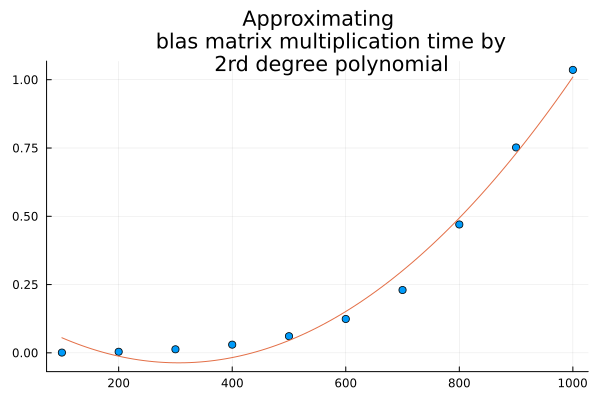

In [15]:
scatter(x, y_blas, label="")
plot!(fit_blas,  
    extrema(x)..., 
    label="",
    title = "Approximating
    blas matrix multiplication time by
    2rd degree polynomial"
)

### Task 4 - Avoiding Runge's phenomenon by using Chebyshev polynomials

Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

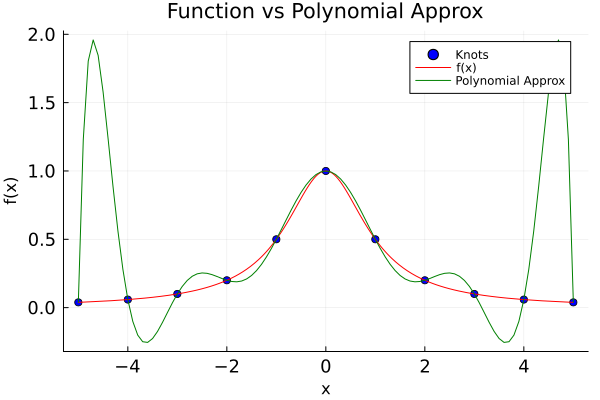

In [23]:
function f1(x)
    1/(1+x^2)
end

x_f = -5:1:5 
y_f = [f1(x) for x in x_f]
poly_fit = fit(x_f,y_f,10)
x_fit = -5:0.1:5
y_fit = [poly_fit(x) for x in x_fit]

scatter(
    x_f,
    y_f,
    xtickfontsize=12, 
    ytickfontsize=12, 
    titlefontsize = 14,
    label="Knots",
    legend_position=:topright,
    color = :blue,
    title = "Function vs Polynomial Approx",
    xlabel = "x",
    ylabel = "f(x)"
)
plot!(
    f1,
    extrema(x_f)...,
    label="f(x)",
    color = :red
)
plot!(
    x_fit,
    y_fit,
    label="Polynomial Approx",
    color = :green
)

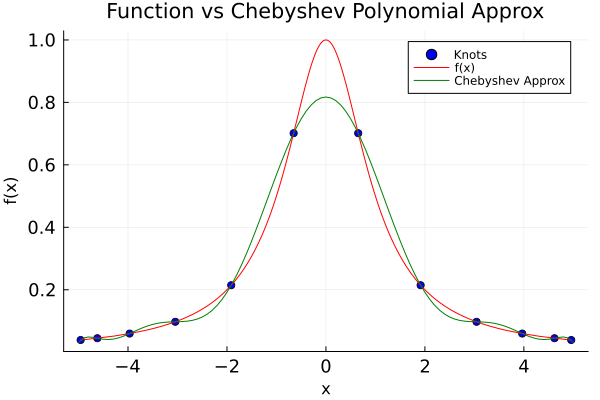

In [30]:
base = [0,0,0,0,0,0,0,0,0,0,0,0,1]
chebyshev = ChebyshevT(base)
x_f = Polynomials.roots(chebyshev) * 5
y_f = [f1(x) for x in x_f]
chebyshev_fit = fit(x_f,y_f,10)
y_fit = [chebyshev_fit(x) for x in x_fit]
scatter(
    x_f,
    y_f,
    xtickfontsize=12, 
    ytickfontsize=12, 
    titlefontsize = 14,
    label="Knots",
    legend_position=:topright,
    color = :blue,
    title = "Function vs Chebyshev Polynomial Approx",
    xlabel = "x",
    ylabel = "f(x)"
)
plot!(
    f1,
    extrema(x_f)...,
    label="f(x)",
    color = :red
)
plot!(
    x_fit,
    y_fit,
    label="Chebyshev Approx",
    color = :green
)

### Task 5 - Pade and Taylor approximations

Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**

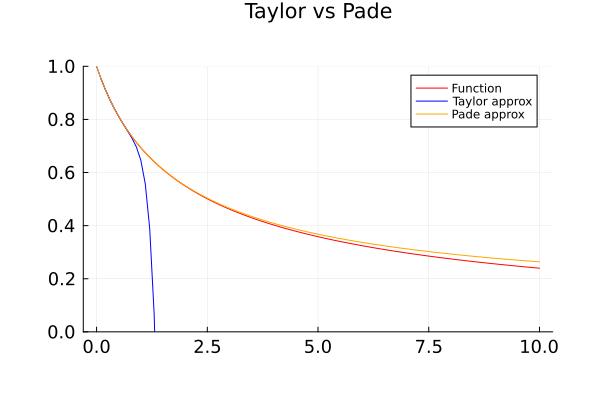

In [17]:
function f2(x)
    log(1+x)/x
end

t = Taylor1(Float64, 10)
taylor_approx = f2(t)
taylor_poly = Polynomial(taylor_approx.coeffs)
pade_poly = Polynomials.PolyCompat.PadeApproximation.Pade(taylor_poly,2,2)

xs = 0:0.1:10
y_f = [f2(x) for x in xs]
y_taylor = [taylor_poly(x) for x in xs]
y_pade = [pade_poly(x) for x in xs]

plot(
    xs,  
    margin=10mm,
    xtickfontsize=12, 
    ytickfontsize=12, 
    titlefontsize = 14,
    [y_f y_taylor y_pade], 
    ylims = [0,1],
    title = "Taylor vs Pade",
    legend_position = :topright, 
    label = ["Function" "Taylor approx" "Pade approx"], 
    color = [:red :blue :orange],
)